# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

для воспроизводимости результатов


# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [6]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [9]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [11]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [12]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [16]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [7]:
df_test.columns[df_test.isna().any()].tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [26]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [28]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [22]:
df_train.columns[df_train.isna().any()].tolist(), df_test.columns[df_test.isna().any()].tolist()

(['mileage', 'engine', 'max_power', 'torque', 'seats'],
 ['mileage', 'engine', 'max_power', 'torque', 'seats'])

In [30]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(985, 62)

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [32]:
nan_cols=df_train.columns[df_train.isna().any()].tolist() # null колонки одинаковые что в трейне что в тесте

In [34]:
nan_cols

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [38]:
df_train[nan_cols].select_dtypes(exclude='object')#выясним какие nan колонки числовые

,seats
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
6994,5.0
6995,5.0
6996,5.0
6997,5.0


In [16]:
df_train['seats']=df_train['seats'].fillna(df_train['seats'].median())#заполним пропуски
df_test['seats']=df_test['seats'].fillna(df_train['seats'].median())

In [17]:
df_train[nun_cols].select_dtypes(include='object')#выясним какие nan колонки имеют тип object

,mileage,engine,max_power,torque
0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
3,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
4,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm
...,...,...,...,...
6994,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
6995,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"
6996,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm
6997,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm


In [18]:
# Поскольку 

df_train['mileage']=df_train['mileage'].fillna(df_train['mileage'].mode()[0])#заполним пропуски
df_test['mileage']=df_test['mileage'].fillna(df_train['mileage'].mode()[0])

df_train['engine']=df_train['engine'].fillna(df_train['engine'].mode()[0])#заполним пропуски
df_test['engine']=df_test['engine'].fillna(df_train['engine'].mode()[0])

df_train['max_power']=df_train['max_power'].fillna(df_train['max_power'].mode()[0])#заполним пропуски
df_test['max_power']=df_test['max_power'].fillna(df_train['max_power'].mode()[0])

df_train['torque']=df_train['torque'].fillna(df_train['torque'].mode()[0])#заполним пропуски
df_test['torque']=df_test['torque'].fillna(df_train['torque'].mode()[0])

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [20]:
feature_columns = df_train.columns.drop('selling_price')
duplicates_mask = df_train.duplicated(subset=feature_columns, keep=False)

In [21]:
duplicates_mask.sum()#найдем количество дубликатов

1799

In [22]:
df_train[duplicates_mask]#Отобразим такие объекты

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [23]:
df_train = df_train.drop_duplicates(subset=feature_columns, keep='first')#Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [24]:
df_train.reset_index(drop=True, inplace=True)#Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [25]:
timur=df_train.copy()

In [26]:
def func(df):# написал функцию реализующую данное задание что бы было более компактно
    df['mileage'] = df['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
    df['engine'] = df['engine'].str.extract(r'(\d+\.?\d*)').astype(float)
    df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)
    df.drop(columns=['torque'], inplace=True)

    return df

# Применяем функцию предобработки к датасетам'
df_train = func(df_train)

<ipython-input-26-4f57d2589ad9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)


In [27]:
df_train.isna().sum()#проверим все ли хорошо

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [28]:
df_train[df_train.isna().any(axis=1)]# NaN после преобразования связано с тем, что некоторые значения в ваших данных имеют формат, не соответствующий ожидаемому шаблону регулярного выражения,в целом это норм,просто обработаем их

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3586,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796.0,NaN,8.0


In [29]:
df_train['max_power']=df_train['max_power'].fillna(df_train['max_power'].median())

In [30]:
df_train.isna().sum()#теперь все хорошо

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [31]:
df_test = func(df_test)

In [32]:
df_test.isna().sum()#тут изначально все хорошо

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [33]:
bad=['mileage', 'engine', 'max_power']

In [34]:
df_train[bad].info()#доп проверкапроверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    5840 non-null   float64
 1   engine     5840 non-null   float64
 2   max_power  5840 non-null   float64
dtypes: float64(3)
memory usage: 137.0 KB


In [35]:
df_test[bad].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    1000 non-null   float64
 1   engine     1000 non-null   float64
 2   max_power  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [36]:
typess=['engine','seats']

In [37]:
df_train[typess]=df_train[typess].astype(int)
df_test[typess]=df_test[typess].astype(int)

In [38]:
df_train[typess].info()#проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   engine  5840 non-null   int64
 1   seats   5840 non-null   int64
dtypes: int64(2)
memory usage: 91.4 KB


In [39]:
df_test[typess].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   engine  1000 non-null   int64
 1   seats   1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [40]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.415872,1429.448973,87.660063,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.987056,485.662834,31.717041,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.100000,1248.000000,81.800000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [41]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.329880,1454.87600,90.692330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.952201,521.99574,34.948341,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.250000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [42]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [43]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [44]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [45]:
assert df_train.shape == (5840, 13) #согласно заданию 3 мы дропаем один из столбцов поэтому их должно быть 12 (если я все правильно понимаю)

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


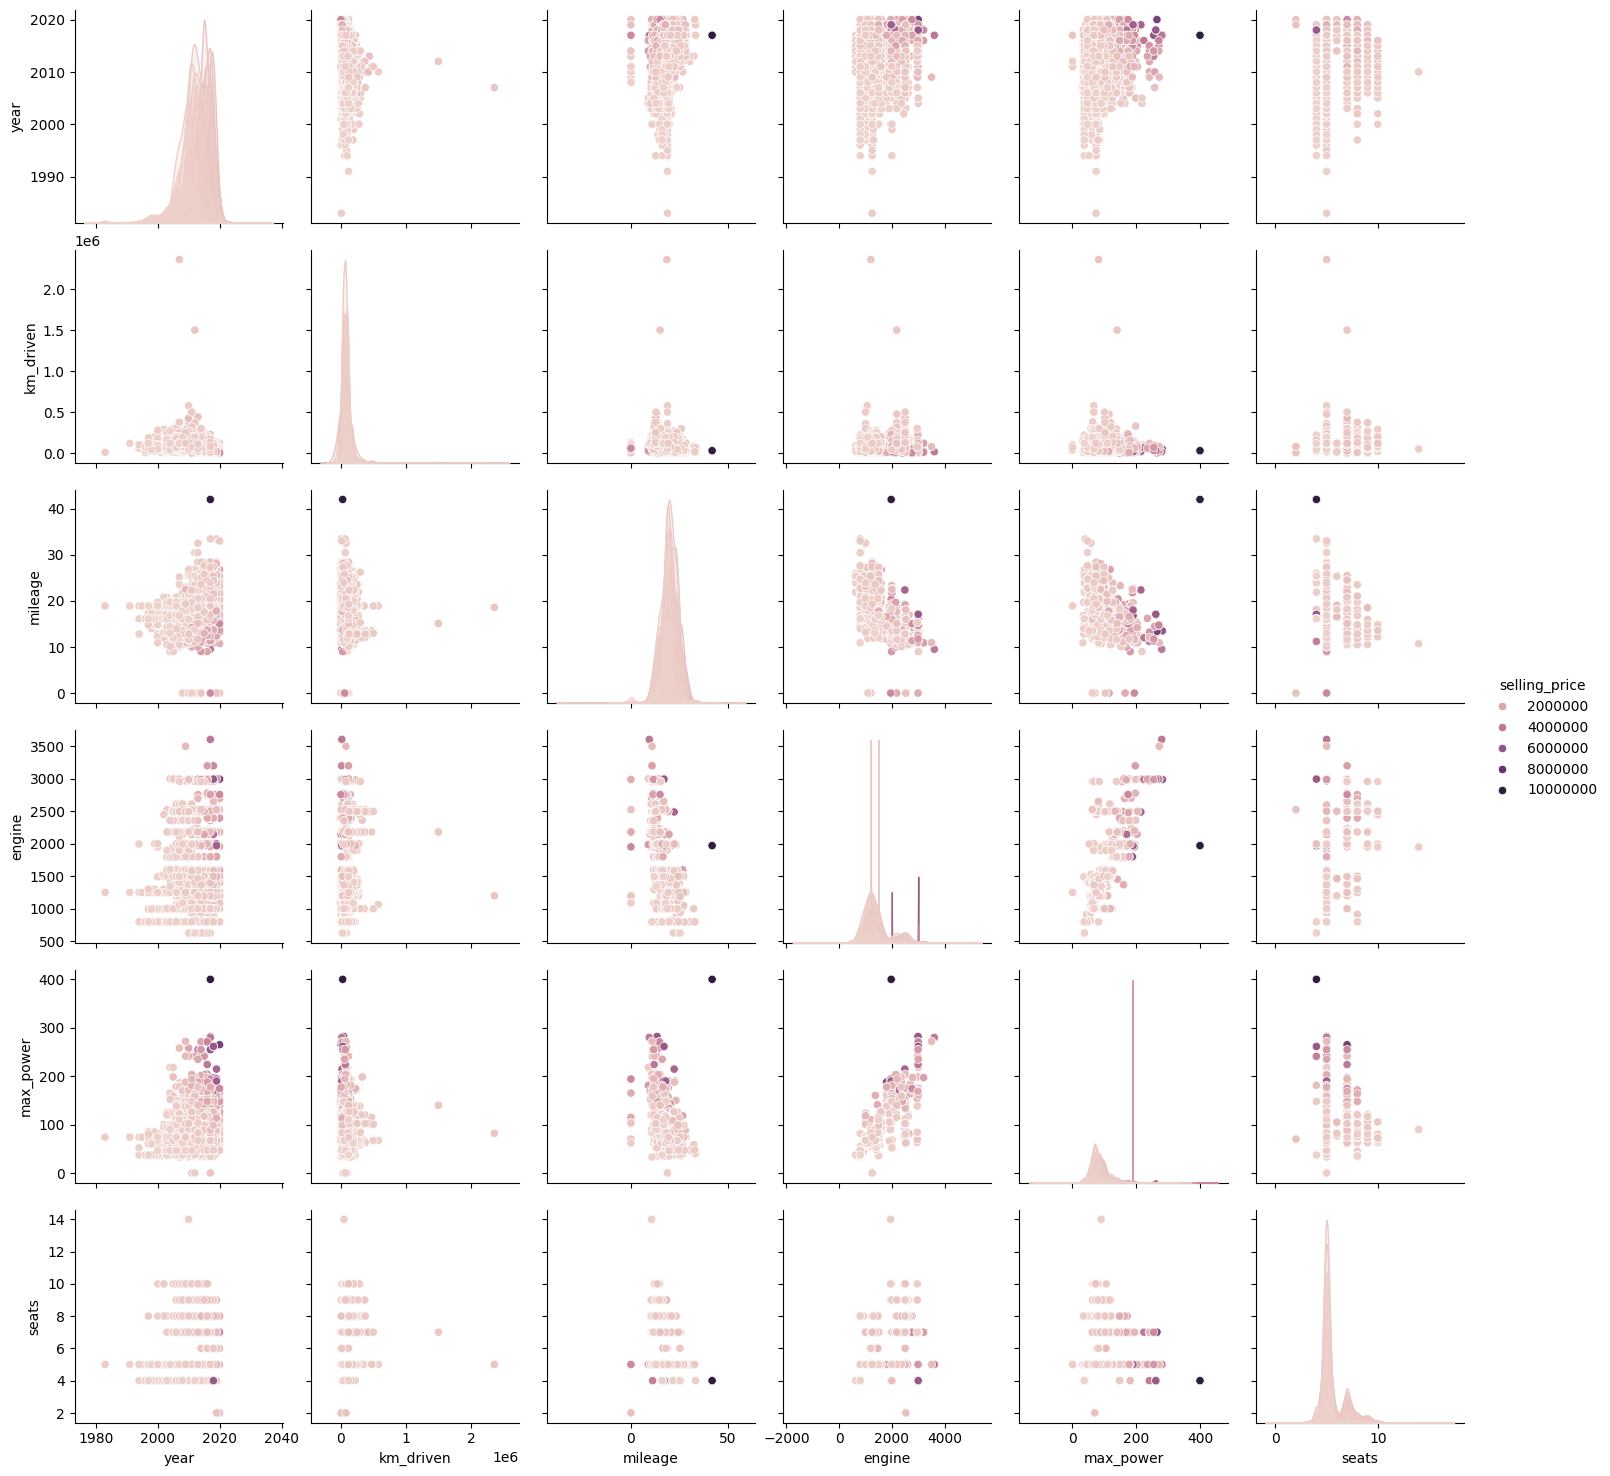

In [48]:
sns.pairplot(df_train, hue='selling_price')

In [ ]:
Можно ли предположить на основе распределений связь признаков с целевой переменной?
Да,по графикам pairplot можно визуально оценить, имеются ли различия в распределениях признаков для различных значений целевой переменной и
если такие различия заметны,то это может указывать на связь между признаками и целевой переменной.
В нашем случае сильная корреляция таргета заметна с колонками year,max_power,и engine
Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
Да, если на парных графиках наблюдаются  зависимости между признаками (как пример,max_power и engine)

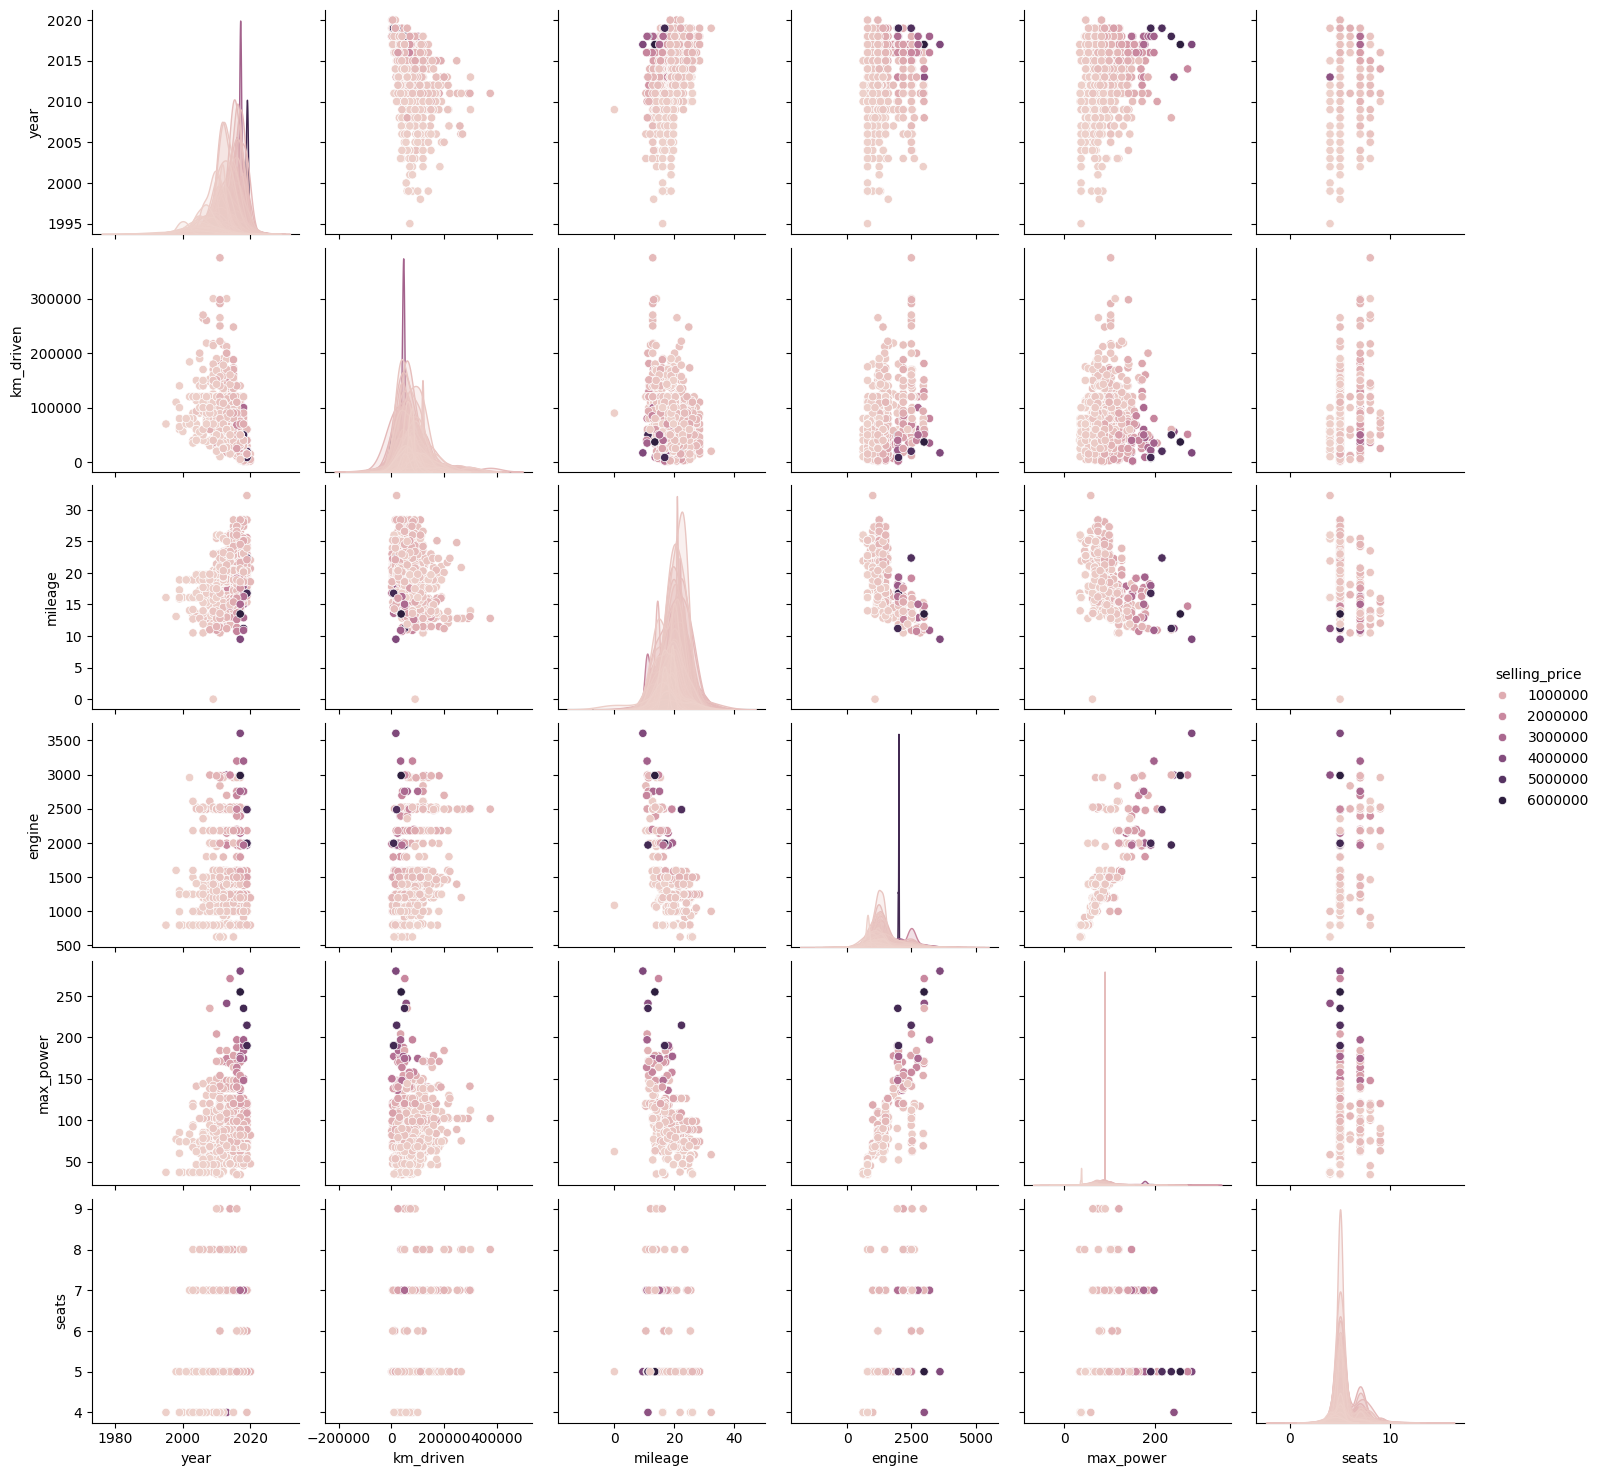

In [53]:
sns.pairplot(df_test, hue='selling_price')

In [ ]:
- Похожими ли оказались совокупности при разделении на трейн и тест?
Да,разделения оказались довольно схожими

`Your answer here`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [54]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


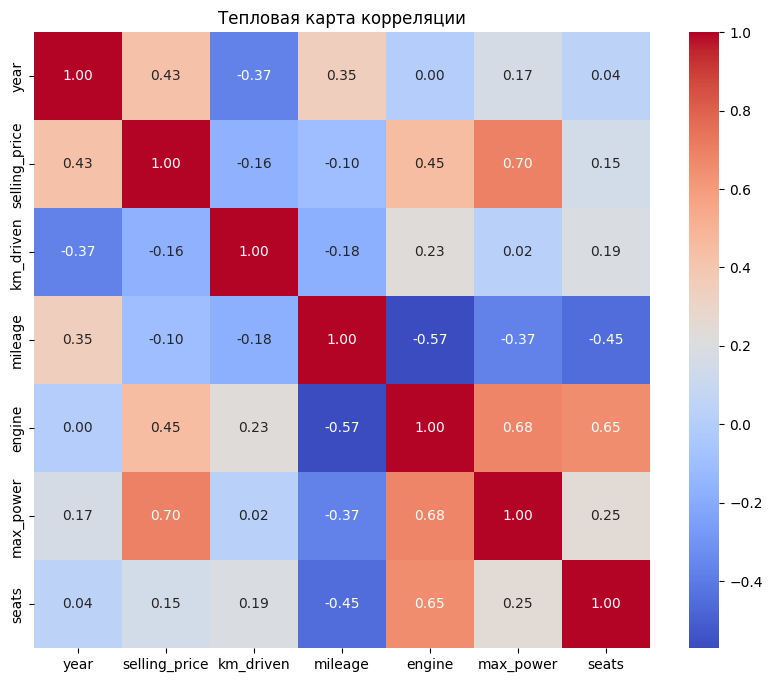

In [55]:
intflot=df_train.select_dtypes(include=[float, int]).columns
correlation_matrix = df_train[intflot].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Тепловая карта корреляции')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [52]:
Какие 2 признака наименее скоррелированы между собой?
Ответ:Между engine и year

SyntaxError: invalid syntax (<ipython-input-52-3f3ee579c252>, line 2)

In [ ]:
Между какими наблюдается довольно сильная положительная линейная зависимость?
Ответ:Между seiling_price и max_power

In [ ]:
Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
Ответ: Да,тк у нас корреляция со знаком минус (ну и просто логически ,чем меньше год выпуска автомобиля,тем больше ему лет и тем больше он скорее всего проедет)


`Your answer here`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [120]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [56]:
vish=df_train.select_dtypes(exclude='object').columns
df_vishka_train=df_train[vish].copy()
df_vishka_test=df_test[vish].copy()
df_vishka_train.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248,74.00,5
1,2014,370000,120000,21.14,1498,103.52,5
2,2010,225000,127000,23.00,1396,90.00,5
3,2007,130000,120000,16.10,1298,88.20,5
4,2017,440000,45000,20.14,1197,81.86,5


In [57]:
y_train = df_vishka_train['selling_price']
X_train = df_vishka_train.drop('selling_price',axis=1)

In [58]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


In [59]:
assert X_train.shape == (5840, 6)

In [60]:
y_test = df_vishka_test['selling_price']
X_test = df_vishka_test.drop('selling_price',axis=1)

In [61]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model=LinearRegression()
model.fit(X_train,y_train)
# your code here

LinearRegression()

In [63]:
y_train_pred_len=model.predict(X_train)
y_test_pred_len=model.predict(X_test)

train_mse = MSE(y_train, y_train_pred_len)
test_mse=MSE(y_test,y_test_pred_len)

train_r2 = r2_score(y_train, y_train_pred_len)
test_r2=r2_score(y_test,y_test_pred_len)

print(f'Трейн MSE: {train_mse}')
print(f'Тест MSE: {test_mse}')

print(f'Трейн r2: {train_r2}')
print(f'Тест r2: {test_r2}')

Трейн MSE: 117191096285.84508
Тест MSE: 233691781105.66504
Трейн r2: 0.5911534480794945
Тест r2: 0.5934582949761242


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [65]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

y_train_pred_stand=model.predict(X_train_scaled)
y_test_pred_stand=model.predict(X_test_scaled)

train_mse = MSE(y_train, y_train_pred_stand)
test_mse=MSE(y_test,y_test_pred_stand)

train_r2 = r2_score(y_train, y_train_pred_stand)
test_r2=r2_score(y_test,y_test_pred_stand)

print(f'Трейн MSE: {train_mse}')
print(f'Тест MSE: {test_mse}')
print(f'Трейн r2: {train_r2}')
print(f'Тест r2: {test_r2}')

Трейн MSE: 117191096285.84517
Тест MSE: 233691781105.65726
Трейн r2: 0.5911534480794942
Тест r2: 0.5934582949761378


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [66]:
coefficients = model.coef_
feature_importance = pd.Series(coefficients, index=X_train.columns)

In [67]:
feature_importance

,0
year,148348.462269
km_driven,-44799.741683
mileage,29504.194114
engine,61194.491006
max_power,323394.606361
seats,-23706.951225


In [68]:
#Самым информативным оказался max_power (что впринципе логично,тк коэффициент коррелияции max_power с целевой переменной был наивысший)

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=42)
lasso.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [70]:
y_train_pred_lasso=lasso.predict(X_train_scaled)
y_test_pred_lasso=lasso.predict(X_test_scaled)

train_mse = MSE(y_train, y_train_pred_lasso)
test_mse=MSE(y_test,y_test_pred_lasso)

train_r2 = r2_score(y_train, y_train_pred_lasso)
test_r2=r2_score(y_test,y_test_pred_lasso)

print(f'Трейн MSE: {train_mse}')
print(f'Тест MSE: {test_mse}')
print(f'Трейн r2: {train_r2}')
print(f'Тест r2: {test_r2}')

Трейн MSE: 117191096296.00012
Тест MSE: 233692451723.18753
Трейн r2: 0.5911534480440664
Тест r2: 0.5934571283369308


In [71]:
coefficients = lasso.coef_
feature_importance = pd.Series(coefficients, index=X_train.columns)

In [72]:
feature_importance #модель не занулила веса предположительно потому что у нас довольно мало фичей,все они вносят вклад + видимо коэффициент alpha регуляризации недостаточно высокий

,0
year,148348.280242
km_driven,-44798.609701
mileage,29502.311533
engine,61189.634411
max_power,323395.511819
seats,-23704.063511


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [73]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=42)

param_grid = {'alpha': np.logspace(-3, 5, 20)}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

In [74]:
print("Коэффициенты лучшей модели:")
print(best_alpha)

Коэффициенты лучшей модели:
37926.901907322455


In [75]:
best_model

Lasso(alpha=37926.901907322455, random_state=42)

In [76]:
np.logspace(-3, 5, 20)

array([1.00000000e-03, 2.63665090e-03, 6.95192796e-03, 1.83298071e-02,
       4.83293024e-02, 1.27427499e-01, 3.35981829e-01, 8.85866790e-01,
       2.33572147e+00, 6.15848211e+00, 1.62377674e+01, 4.28133240e+01,
       1.12883789e+02, 2.97635144e+02, 7.84759970e+02, 2.06913808e+03,
       5.45559478e+03, 1.43844989e+04, 3.79269019e+04, 1.00000000e+05])

In [77]:
coefficients = best_model.coef_

In [78]:
coefficients

array([135691.79202022,  -7185.54807306,      0.        ,      0.        ,
       311735.19844093,     -0.        ])

In [79]:
lasso = Lasso(alpha=37926.90190732246,random_state=42)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lassogrid=lasso.predict(X_train_scaled)
y_test_pred_lassogrid=lasso.predict(X_test_scaled)

train_mse = MSE(y_train, y_train_pred_lassogrid)
test_mse=MSE(y_test,y_test_pred_lassogrid)

train_r2 = r2_score(y_train, y_train_pred_lassogrid)
test_r2=r2_score(y_test,y_test_pred_lassogrid)

print(f'Трейн MSE: {train_mse}')
print(f'Тест MSE: {test_mse}')
print(f'Трейн r2: {train_r2}')
print(f'Тест r2: {test_r2}')

Трейн MSE: 121646821836.93738
Тест MSE: 258161002110.13406
Трейн r2: 0.5756086832841829
Тест r2: 0.5508904358041111


In [ ]:
Сколько грид-сёрчу пришлось обучать моделей?
Ответ: 20 (число значений alpha) * 10 (число фолдов) = 200 моделей

In [ ]:
Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?
Ответ: Лучший коэффициент получился alpha=37926.90190732246.Да,занулились ,связано это с высоким значением регуляризационного параметра alpha в модели Lasso

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [80]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(random_state=42)

param_grid = {
    'alpha': np.logspace(-3, 5, 20),   # 20 значений от 1e-3 до 1e5
    'l1_ratio': np.linspace(0, 1, 10)  # 10 значений от 0 до 1
}

grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

# Обучение модели с перебором по сетке
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print(f"alpha: {best_alpha}")
print(f"l1_ratio: {best_l1_ratio}")

alpha: 0.3359818286283781
l1_ratio: 0.5555555555555556


In [81]:
ElasticNet = ElasticNet(alpha=0.3359818286283781,l1_ratio=0.5555555555555556,random_state=42)
ElasticNet.fit(X_train_scaled, y_train)

y_train_pred_ElasticNet=ElasticNet.predict(X_train_scaled)
y_test_pred_ElasticNet=ElasticNet.predict(X_test_scaled)

train_mse = MSE(y_train, y_train_pred_ElasticNet)
test_mse=MSE(y_test,y_test_pred_ElasticNet)

train_r2 = r2_score(y_train, y_train_pred_ElasticNet)
test_r2=r2_score(y_test,y_test_pred_ElasticNet)

print(f'Трейн MSE: {train_mse}')
print(f'Тест MSE: {test_mse}')
print(f'Трейн r2: {train_r2}')
print(f'Тест r2: {test_r2}')

Трейн MSE: 119374851087.64899
Тест MSE: 252406206661.09286
Трейн r2: 0.5835349459129164
Тест r2: 0.5609017607332449


In [82]:
сколько пришлось обучать моделей?
Ответ: 20*10*10=2000 моделей
Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?
Лучшие гиперпараметры:
alpha: 0.3359818286283781
l1_ratio: 0.5555555555555556

SyntaxError: invalid syntax (<ipython-input-82-5ee310e2d1a5>, line 1)

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [83]:
df_vishka2=df_train.copy()
df_vishka2_test=df_test.copy()

In [84]:
df_vishka2.shape

(5840, 12)

In [85]:
df_vishka2_train=df_vishka2.drop('name',axis=1)
df_vishka2_test=df_vishka2_test.drop('name',axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [87]:
X_train_name=df_train.drop('selling_price',axis=1)#как вариант может предобработать с помощью LabelEncoder
y_train_name=df_train['selling_price']

In [88]:
X_train_name

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [89]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train_name['name']=label_encoder.fit_transform(X_train_name['name'])

In [90]:
X_train_name.shape

(5840, 11)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [92]:
df_vishka2_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   int64  
 1   selling_price  5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   int64  
 9   max_power      5840 non-null   float64
 10  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 502.0+ KB


In [93]:
df_vishka2_test

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,7
1,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,5
2,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,5
3,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,5
4,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,5
...,...,...,...,...,...,...,...,...,...,...,...
995,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,5
996,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,5
997,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
998,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,5


In [94]:
df_vishka2_train.select_dtypes(include='object')

,fuel,seller_type,transmission,owner
0,Diesel,Individual,Manual,First Owner
1,Diesel,Individual,Manual,Second Owner
2,Diesel,Individual,Manual,First Owner
3,Petrol,Individual,Manual,First Owner
4,Petrol,Individual,Manual,First Owner
...,...,...,...,...
5835,Petrol,Individual,Manual,First Owner
5836,Petrol,Individual,Manual,Second Owner
5837,Petrol,Individual,Manual,First Owner
5838,Diesel,Individual,Manual,Fourth & Above Owner


In [95]:
df_combined = pd.concat([df_vishka2_train, df_vishka2_test],ignore_index=True)#обьединим что бы закодировать

In [96]:
df_combined

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...
6835,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,5
6836,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,5
6837,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
6838,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,5


In [97]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
df_combined_encoded = pd.get_dummies(df_combined, columns=['fuel','seller_type',	'transmission',	'owner','seats'],drop_first=True)
train_rows=5840
test_rows=1000
train_encoded = df_combined_encoded.iloc[:train_rows].reset_index(drop=True)
test_encoded = df_combined_encoded.iloc[train_rows:].reset_index(drop=True)

# your code here

In [98]:
test_encoded

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2010,229999,168000,14.00,2498,112.00,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2017,665000,25000,21.50,1497,108.50,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,2007,175000,218463,12.90,1799,130.00,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
3,2015,635000,173000,25.10,1498,98.60,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,2011,130000,70000,16.50,1172,65.00,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,250000,100000,19.81,1086,68.05,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
996,2017,440000,50000,18.60,1197,81.83,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
997,2009,340000,40000,23.00,1396,90.00,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
998,2012,350000,25000,20.36,1197,78.90,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False


In [99]:
train_encoded

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,450000,145500,23.40,1248,74.00,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,2014,370000,120000,21.14,1498,103.52,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,2010,225000,127000,23.00,1396,90.00,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,2007,130000,120000,16.10,1298,88.20,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
4,2017,440000,45000,20.14,1197,81.86,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,120000,191000,17.92,1086,62.10,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
5836,2013,260000,50000,18.90,998,67.10,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
5837,2013,320000,110000,18.50,1197,82.85,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
5838,2007,135000,119000,16.80,1493,110.00,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [100]:
train_encodedX=train_encoded.drop('selling_price',axis=1)
train_encodedY=train_encoded['selling_price']
test_encodedX=test_encoded.drop('selling_price',axis=1)
test_encodedY=test_encoded['selling_price']

In [101]:
train_encodedX

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,2014,120000,21.14,1498,103.52,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,2010,127000,23.00,1396,90.00,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,2007,120000,16.10,1298,88.20,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2017,45000,20.14,1197,81.86,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
5836,2013,50000,18.90,998,67.10,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
5837,2013,110000,18.50,1197,82.85,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
5838,2007,119000,16.80,1493,110.00,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
Ridgeeee_net = Ridge(random_state=42)

param_grid = {
    'alpha': np.logspace(-3, 5, 20),   # 20 значений от 1e-3 до 1e5
}

grid_search = GridSearchCV(
    estimator=Ridgeeee_net,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

# Обучение модели с перебором по сетке
grid_search.fit(train_encodedX, train_encodedY)
best_alpha = grid_search.best_params_['alpha']
print(f"alpha: {best_alpha}")

# your code here

alpha: 6.158482110660261


In [104]:
Ridgeee = Ridge(alpha=6.158482110660261,random_state=42)
Ridgeee.fit(train_encodedX, train_encodedY)

y_train_pred_Ridgeee=Ridgeee.predict(train_encodedX)
y_test_pred_Ridgeee=Ridgeee.predict(test_encodedX)

train_mse = MSE(train_encodedY, y_train_pred_Ridgeee)
test_mse=MSE(test_encodedY,y_test_pred_Ridgeee)

train_r2 = r2_score(train_encodedY, y_train_pred_Ridgeee)
test_r2=r2_score(test_encodedY,y_test_pred_Ridgeee)

print(f'Трейн MSE: {train_mse}')
print(f'Тест MSE: {test_mse}')
print(f'Трейн r2: {train_r2}')
print(f'Тест r2: {test_r2}')

Трейн MSE: 98555054080.53625
Тест MSE: 204969343287.13657
Трейн r2: 0.6561693224809171
Тест r2: 0.643425259102719


In [ ]:
#значительно лучше чем в начале)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [106]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = np.abs(y_pred - y_true) / y_true
    successful_predictions = np.sum(relative_error <= 0.10)
    total_predictions = len(y_true)
    business_metric = successful_predictions / total_predictions
    return business_metric

In [108]:
business_metric(test_encodedY,y_test_pred_len)#обычная линейная регрессия

0.221

In [110]:
business_metric(test_encodedY,y_test_pred_stand)#обычная линейная регрессия+стандартизация

0.221

In [111]:
business_metric(test_encodedY,y_test_pred_lasso)#лассо регрессия

0.221

In [112]:
business_metric(test_encodedY,y_test_pred_lassogrid)#лассо регрессия+гридсерч

0.231

In [113]:
business_metric(test_encodedY,y_test_pred_ElasticNet)#ElasticNet

0.247

In [114]:
business_metric(test_encodedY,y_test_pred_Ridgeee)#Ridge

0.242

In [ ]:
Лучше всего решает бизнес задачу ElasticNet

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

